# Learning outcomes

* Introduce the participants to machine learning prediction tasks
    * regression tasks
    * classification tasks
* Introduce the participants to machine learning processing operations 
    * labels encoding
    * data standardization
    * features selection
* Introduce the participants to tree-based machine learning models
    * decision trees
    * random forests
* Introduce the participants to machine learning evaluation metrics and methods
    * regression evaluation metrics
        * mean absolute error
        * mean squared error
    * classification evaluation metrics
        * Accuracy
        * precision 
        * recall 
        * F-1

# Related imports

In [1]:
import os
import sklearn
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
preprocessed_data_path = os.path.join('.','data','preprocessed')

In [3]:
structural_data_full = pd.read_csv(os.path.join(preprocessed_data_path,'structural_data_full.csv'))
structural_data_left = pd.read_csv(os.path.join(preprocessed_data_path,'structural_data_left.csv'))
structural_data_right = pd.read_csv(os.path.join(preprocessed_data_path,'structural_data_right.csv'))

# Prediction tasks

## Regression tasks

**What is regression?**

Regression algorithms predict a **continuous value** based on the input variables. The main goal of regression problems is to estimate a mapping function based on the input and output variables. If your target variable is a quantity like income, scores, height or weight, or the probability of a binary category (like the probability of rain in particular regions), then you should use the regression model. However, there are various types of regressions used by data scientists and ML engineers based on different scenarios. The different types of regression algorithms include:

* Simple linear regression
* Multiple linear regression
* Tree-based regression
* Deep neural networks

## Classification tasks

**What is classification?**

Classification is a predictive model that approximates a mapping function from input variables to identify **discrete output variables**, which can be labels or categories. The mapping function of classification algorithms is responsible for predicting the label or category of the given input variables. A classification algorithm can have both discrete and real-valued variables, but it requires that the examples be classified into one of two or more classes. 

* Tree-based classification
* K-nearest neighbor classification
* Deep neural networks

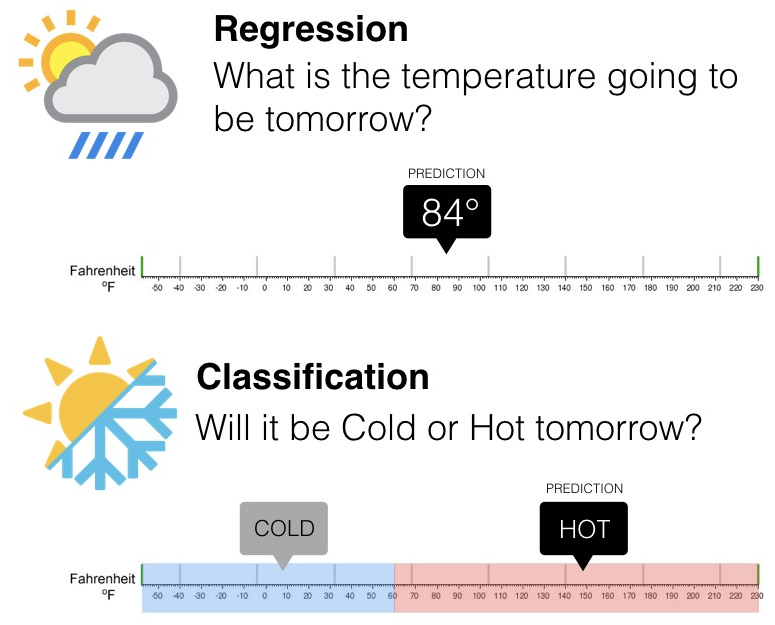

# Preprocessing operations

In [4]:
# encodes gender column
label_encoder = preprocessing.LabelEncoder()

In [5]:
genders = label_encoder.fit_transform(structural_data_full['sex'])

In [6]:
structural_data_full['sex'] = genders
structural_data_left['sex'] = genders
structural_data_right['sex'] = genders

In [7]:
scaler = preprocessing.StandardScaler()

In [8]:
scaled_data = scaler.fit_transform(structural_data_full.iloc[:,1:-2])

In [9]:
structural_data_full.iloc[:,1:-2] = scaled_data
structural_data_left = structural_data_full[list(structural_data_left.columns)]
structural_data_right = structural_data_full[list(structural_data_right.columns)]

# Left Hemisphere

In [10]:
x = np.array(structural_data_left.iloc[:,1:-1])
y = np.array(structural_data_left['age'])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

In [12]:
model = RandomForestRegressor(n_estimators=1000,random_state=2,)  

In [13]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=2)

In [14]:
preds = model.predict(x_test)

In [15]:
metrics.mean_absolute_percentage_error(y_test,preds)

0.13106755703518613

In [16]:
# Features importance
features = [(structural_data_left.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

Left-Inf-Lat-Vent: 0.2129
Left-Lateral-Ventricle: 0.1979
Left-Accumbens-area: 0.1450
Left-Thalamus: 0.0579
Left-Hippocampus: 0.0266
Left-choroid-plexus: 0.0234
Left-Amygdala: 0.0229
Left-VentralDC: 0.0133
ctx-lh-inferiorparietal: 0.0131
Left-Putamen: 0.0129


# Right hemisphere

In [17]:
x = np.array(structural_data_right.iloc[:,1:-1])
y = np.array(structural_data_right['age'])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

In [19]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=2)

In [20]:
preds = model.predict(x_test)

In [21]:
metrics.mean_absolute_percentage_error(y_test,preds)

0.133810587745046

In [22]:
# Features importance
features = [(structural_data_right.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

Right-Lateral-Ventricle: 0.2666
Right-Inf-Lat-Vent: 0.2057
Right-Thalamus: 0.0934
Right-Hippocampus: 0.0342
Right-VentralDC: 0.0288
Right-Putamen: 0.0216
Right-Cerebellum-White-Matter: 0.0152
Right-choroid-plexus: 0.0146
Right-Accumbens-area: 0.0143
ctx-rh-rostralmiddlefrontal: 0.0136


# Full dataset

In [23]:
x = np.array(structural_data_full.iloc[:,1:-1])
y = np.array(structural_data_full['age'])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

In [25]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=2)

In [26]:
preds = model.predict(x_test)

In [27]:
metrics.mean_absolute_percentage_error(y_test,preds)

0.12360845635907049

In [28]:
# Features importance
features = [(structural_data_full.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

WM-hypointensities: 0.4830
3rd-Ventricle: 0.0847
Left-Accumbens-area: 0.0488
Left-Thalamus: 0.0201
Right-Putamen: 0.0170
Left-Putamen: 0.0155
Right-Inf-Lat-Vent: 0.0148
Left-Amygdala: 0.0123
Left-Lateral-Ventricle: 0.0115
Left-Hippocampus: 0.0104


# With features selection

<Axes: >

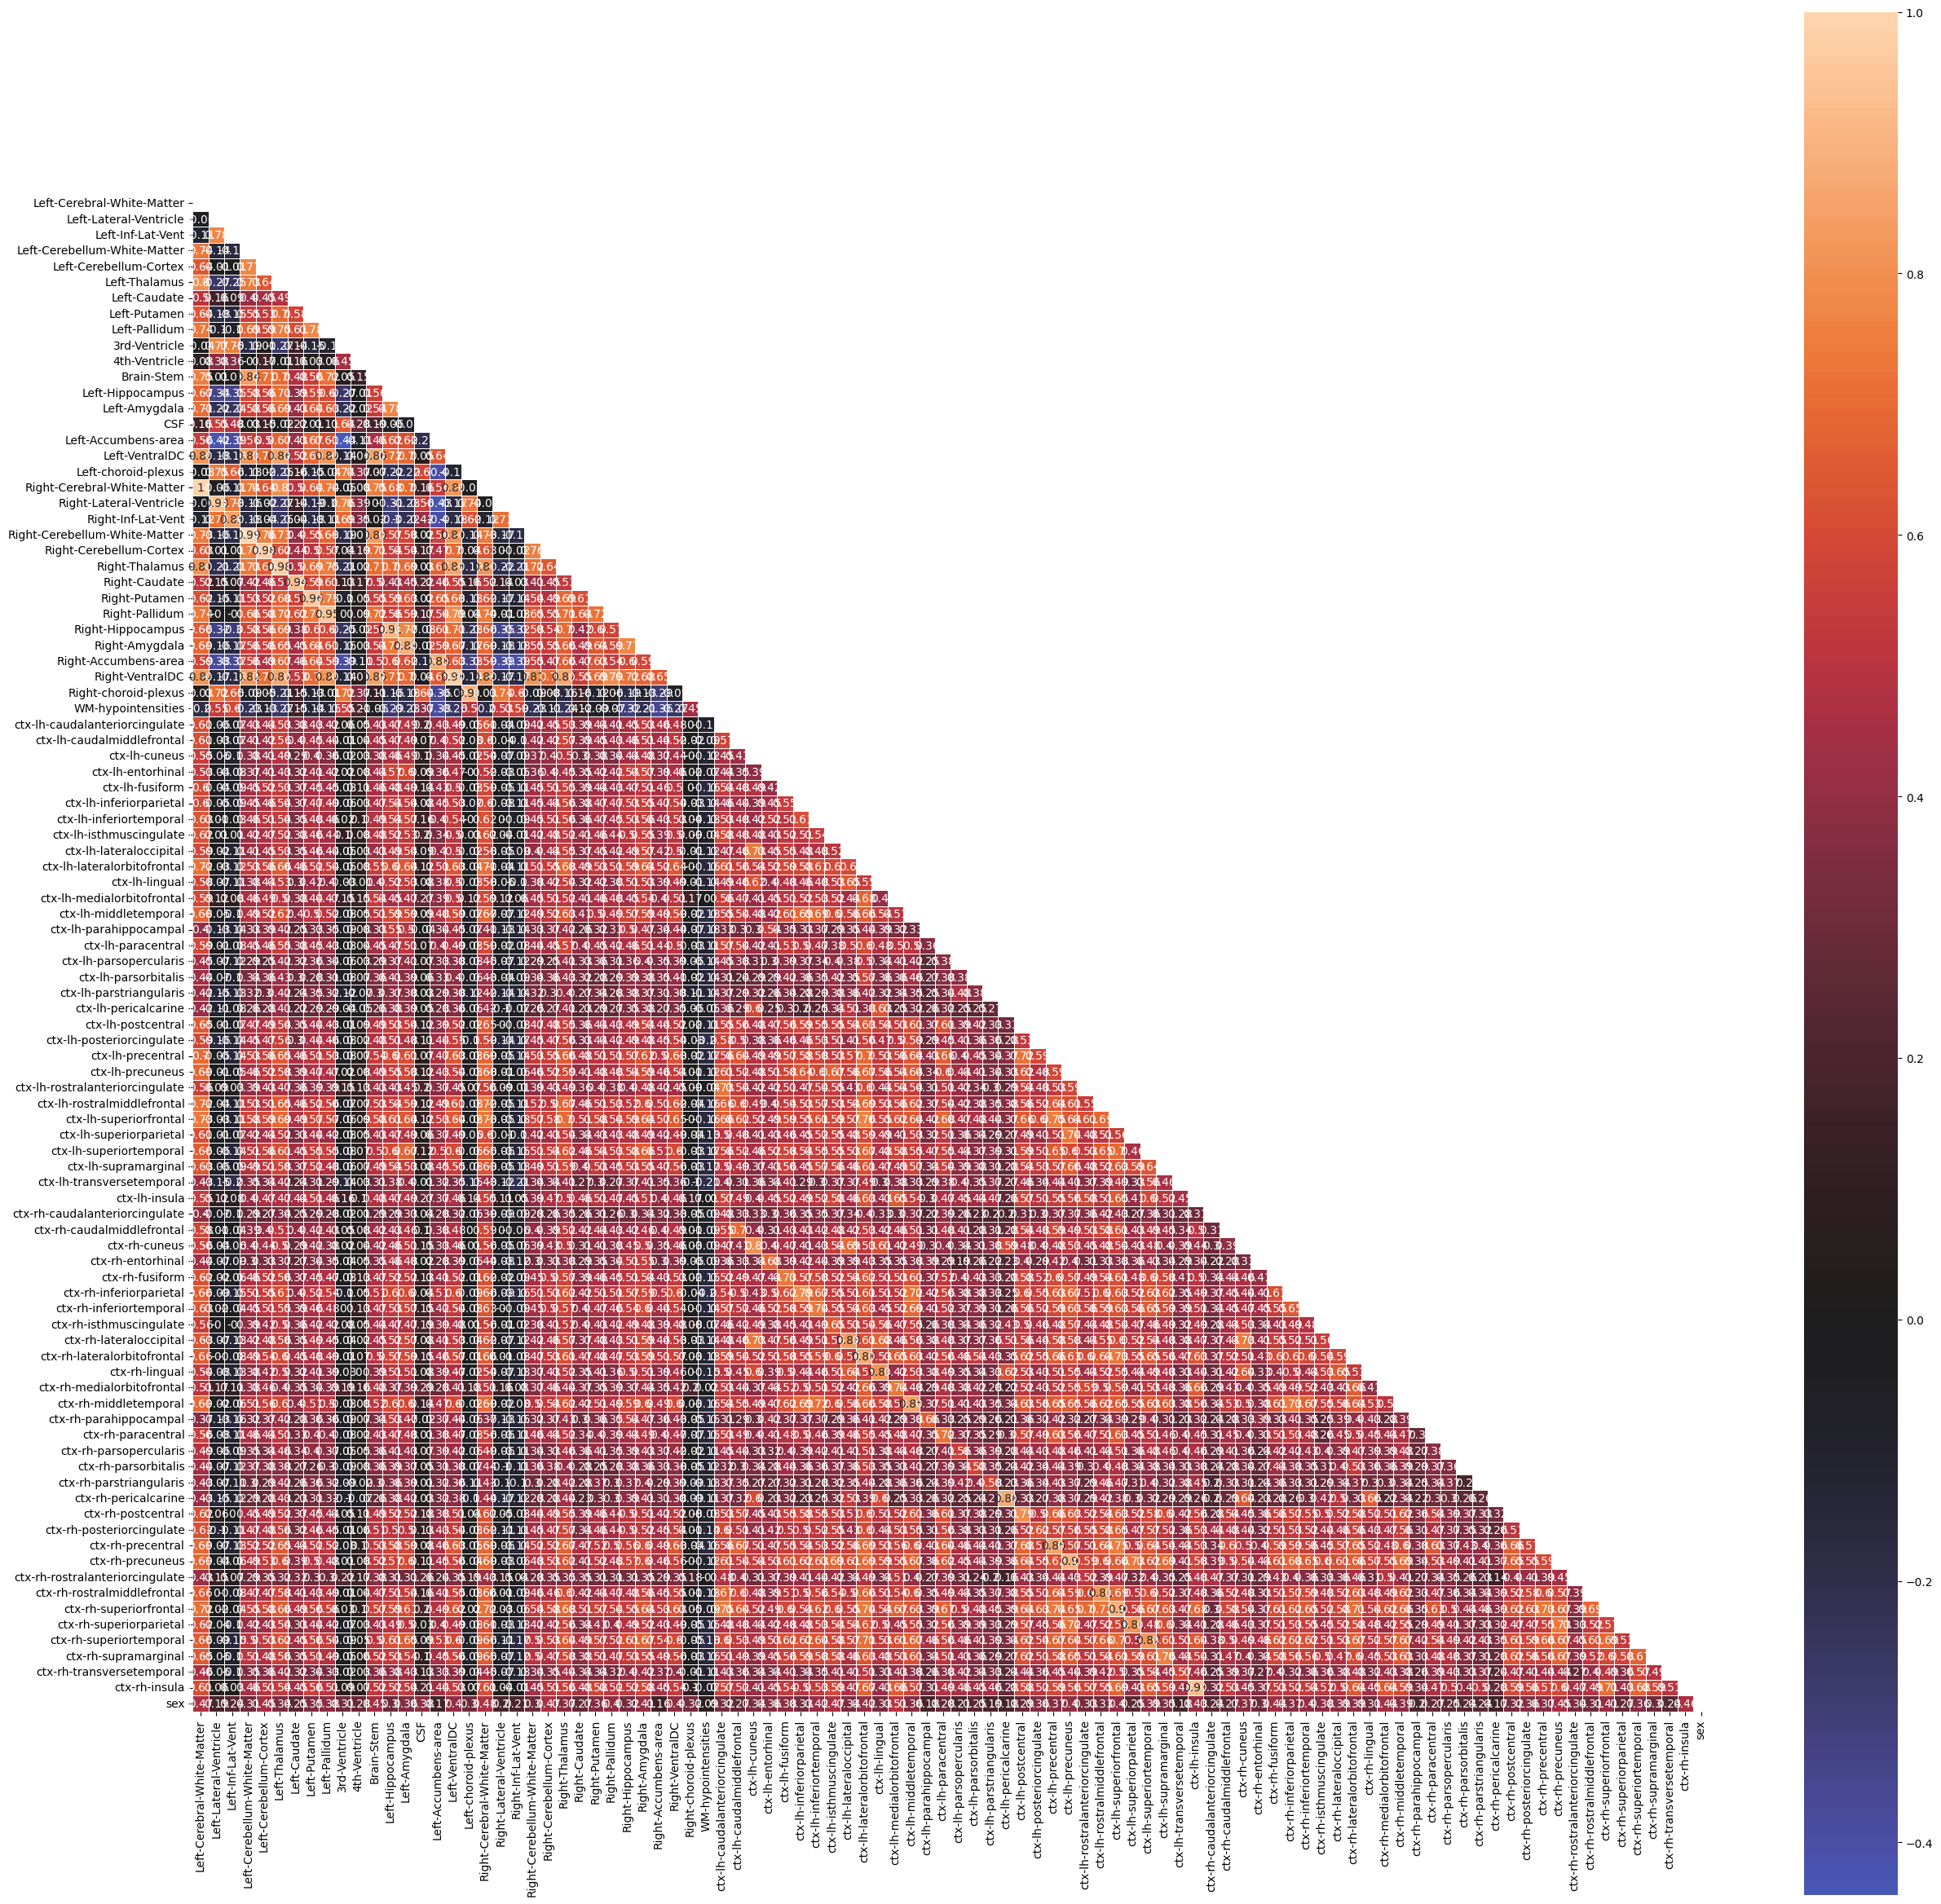

In [29]:
mask = np.zeros_like(structural_data_full.iloc[:,1:-1].corr().round(2), dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(structural_data_full.iloc[:,1:-1].corr().round(2), mask=mask,vmax=1,
            center=0,square=True, linewidths=.5,annot=True)

In [30]:
#Highly correlated features extraction
corr_matrix = structural_data_full.iloc[:,1:-1].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                      k=1).astype(bool))
Highly_Corr = [column for column in upper.columns if any(upper[column] > 0.8)]
print('The highly Correlated features are:\n\n',Highly_Corr)

The highly Correlated features are:

 ['Left-Thalamus', 'Brain-Stem', 'Left-VentralDC', 'Right-Cerebral-White-Matter', 'Right-Lateral-Ventricle', 'Right-Inf-Lat-Vent', 'Right-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex', 'Right-Thalamus', 'Right-Caudate', 'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area', 'Right-VentralDC', 'Right-choroid-plexus', 'ctx-rh-cuneus', 'ctx-rh-lateraloccipital', 'ctx-rh-lateralorbitofrontal', 'ctx-rh-lingual', 'ctx-rh-middletemporal', 'ctx-rh-pericalcarine', 'ctx-rh-precentral', 'ctx-rh-precuneus', 'ctx-rh-rostralmiddlefrontal', 'ctx-rh-superiorfrontal', 'ctx-rh-superiorparietal', 'ctx-rh-superiortemporal', 'ctx-rh-insula']


In [31]:
structural_data_full.drop(Highly_Corr,axis=1,inplace=True)

In [32]:
structural_data_full

,subject,Left-Cerebral-White-Matter,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,ctx-rh-parsopercularis,ctx-rh-parsorbitalis,ctx-rh-parstriangularis,ctx-rh-postcentral,ctx-rh-posteriorcingulate,ctx-rh-rostralanteriorcingulate,ctx-rh-supramarginal,ctx-rh-transversetemporal,sex,age
0,HCA6660880,-0.591543,-1.117732,-1.002436,-0.389758,-0.777068,-0.950304,0.623417,-0.497052,-1.092332,...,-1.372674,-0.510676,1.904607,-0.805723,-0.057396,-1.141605,-1.259029,-1.374177,0,41.500000
1,HCA8515578,0.749853,1.310726,2.264559,-0.519615,-0.023067,0.161878,-0.180511,-0.556583,3.063440,...,1.699375,-0.907650,1.372169,1.166626,1.231713,2.004086,0.704819,5.241726,1,80.166667
2,HCA6111241,-0.199274,1.666751,2.284081,-0.354320,-0.412097,-0.921193,-0.063927,-0.168506,1.930860,...,-0.527008,-0.277971,0.354978,0.613098,-0.163502,0.130650,0.080044,-1.009290,1,85.166667
3,HCA8065270,0.372630,-0.036290,-0.558376,1.119354,0.147416,1.130121,0.400043,1.625312,-0.375072,...,0.224045,-0.186592,-0.656951,-0.073411,0.651314,-0.291002,1.746357,-0.583913,0,66.250000
4,HCA9409786,-1.076853,-0.125307,-0.473775,-0.154997,0.175840,-0.161120,-0.284153,-0.500865,-0.471993,...,-1.142758,-1.177634,-1.443264,-0.183472,-0.958313,-1.429630,-1.212175,-0.211258,0,62.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,HCA7130957,0.395471,-0.693730,-0.649825,0.334255,1.020324,0.199500,0.968407,0.192438,-0.579225,...,0.591023,0.501185,-0.485311,0.129376,0.575975,0.388066,1.274332,0.990362,1,39.166667
721,HCA9160370,-0.872743,-0.764912,-0.668449,-0.475228,-0.314510,-0.733469,-0.487672,-1.019375,-0.858411,...,-0.144817,-1.492122,-0.488216,-0.772602,-1.102249,-0.466274,-0.063062,-0.711844,0,66.000000
722,HCA9922091,0.017223,-0.016624,0.142637,-0.255993,-0.529017,0.001309,-0.729924,-0.136717,1.086302,...,-0.038186,-0.962603,0.590986,-0.208629,0.046028,1.434697,0.815152,-1.531447,0,76.000000
723,HCA9708190,-1.216322,-0.132282,-0.623331,-0.394983,-1.467091,-0.993276,-0.583300,-0.633366,-0.755540,...,-0.370790,-0.988433,-1.245939,0.416195,0.224983,-0.516801,-0.048729,-0.502297,0,55.416667


In [33]:
x = np.array(structural_data_full.iloc[:,1:-1])
y = np.array(structural_data_full['age'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

In [35]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=2)

In [36]:
preds = model.predict(x_test)

In [37]:
metrics.mean_absolute_percentage_error(y_test,preds)

0.12570549426744165

# Cognitive impairment 

In [38]:
structural_moca = pd.read_csv(os.path.join(preprocessed_data_path,'structural_moca.csv'))

In [39]:
structural_moca.sex = structural_data_full.sex

In [40]:
label_encoder = preprocessing.LabelEncoder()

In [41]:
classes = label_encoder.fit_transform(structural_moca['class'])

In [42]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [43]:
mapping

{'mild': 0, 'normal': 1}

In [44]:
structural_moca['class'] = classes

In [45]:
scaled_data = scaler.fit_transform(structural_moca.iloc[:,1:-2])

In [46]:
structural_moca.iloc[:,1:-2] = scaled_data

/tmpdata/ipykernel_1092846/1549457771.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.88640526  1.12815215  1.12815215 -0.88640526 -0.88640526 -0.88640526
 -0.88640526  1.12815215  1.12815215 -0.88640526 -0.88640526 -0.88640526
  1.12815215 -0.88640526 -0.88640526 -0.88640526  1.12815215  1.12815215
 -0.88640526 -0.88640526 -0.88640526 -0.88640526  1.12815215 -0.88640526
 -0.88640526  1.12815215 -0.88640526  1.12815215 -0.88640526 -0.88640526
 -0.88640526 -0.88640526 -0.88640526  1.12815215  1.12815215 -0.88640526
 -0.88640526 -0.88640526  1.12815215  1.12815215  1.12815215  1.12815215
  1.12815215 -0.88640526  1.12815215  1.12815215 -0.88640526 -0.88640526
  1.12815215 -0.88640526 -0.88640526  1.12815215  1.12815215 -0.88640526
  1.12815215  1.12815215 -0.88640526 -0.88640526 -0.88640526  1.12815215
  1.12815215  1.12815215  1.12815215 -0.88640526 -0.88640526  1.12815215
  1.12815215  1.12815215  1.1281521

In [47]:
x = np.array(structural_moca.iloc[:,1:-1])
y = np.array(structural_moca['class']).reshape(-1, 1)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [49]:
model= RandomForestClassifier(n_estimators=1000,random_state=0)

In [50]:
model.fit(x_train,y_train.reshape(-1))
preds = model.predict(x_test)

In [51]:
acc = round(metrics.accuracy_score(y_test, preds)*100,1)
print("Accuracy score:",acc)

Accuracy score: 69.0


In [52]:
# Features importance
features = [(structural_moca.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

Right-Inf-Lat-Vent: 0.0195
ctx-lh-entorhinal: 0.0181
age: 0.0171
WM-hypointensities: 0.0161
Left-Inf-Lat-Vent: 0.0155
ctx-rh-postcentral: 0.0154
Left-Amygdala: 0.0148
Right-Lateral-Ventricle: 0.0139
ctx-lh-medialorbitofrontal: 0.0133
3rd-Ventricle: 0.0129


# Structural data with personality

In [180]:
# structural_personality = pd.read_csv(os.path.join(preprocessed_data_path,'structural_personality_ocean.csv'))

In [181]:
# scaler = preprocessing.MinMaxScaler(feature_range=(1,5))

In [182]:
# structural_personality.sex = genders

In [184]:
# scaled_data = scaler.fit_transform(structural_personality.iloc[:,1:98])

In [187]:
# structural_personality.iloc[:,1:98] = scaled_data

In [188]:
# label_encoder_ag = preprocessing.LabelEncoder()
# label_encoder_co = preprocessing.LabelEncoder()
# label_encoder_ex = preprocessing.LabelEncoder()
# label_encoder_ne = preprocessing.LabelEncoder()
# label_encoder_op = preprocessing.LabelEncoder()

In [102]:
# class_ag = label_encoder_ag.fit_transform(structural_personality.class_ag)
# class_co = label_encoder_co.fit_transform(structural_personality.class_co)
# class_ex = label_encoder_ex.fit_transform(structural_personality.class_ex)
# class_ne = label_encoder_ne.fit_transform(structural_personality.class_ne)
# class_op = label_encoder_op.fit_transform(structural_personality.class_op)

In [190]:
# mapping_ag = dict(zip(label_encoder_ag.classes_, label_encoder_ag.transform(label_encoder_ag.classes_)))
# mapping_co = dict(zip(label_encoder_co.classes_, label_encoder_co.transform(label_encoder_co.classes_)))
# mapping_ex = dict(zip(label_encoder_ex.classes_, label_encoder_ex.transform(label_encoder_ex.classes_)))
# mapping_ne = dict(zip(label_encoder_ne.classes_, label_encoder_ne.transform(label_encoder_ne.classes_)))
# mapping_op = dict(zip(label_encoder_op.classes_, label_encoder_op.transform(label_encoder_op.classes_)))

In [97]:
# print('AG =',mapping_ag)
# print('CO =',mapping_co)
# print('EX =',mapping_ex)
# print('NE =',mapping_ne)
# print('OP =',mapping_op)

In [98]:
# structural_personality.class_ag = class_ag
# structural_personality.class_co = class_co
# structural_personality.class_ex = class_ex
# structural_personality.class_ne = class_ne
# structural_personality.class_op = class_op

In [99]:
# x = np.array(structural_personality.iloc[:,1:-5])
# y = np.array(structural_personality.iloc[:,-5:])

In [100]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [101]:
# model = MultiOutputClassifier(R).fit(x_train,y_train)

In [281]:
# preds = model.predict(x_test)

In [282]:
# ag_acc = metrics.accuracy_score(y_test[:,0],preds[:,0])*100
# co_acc = metrics.accuracy_score(y_test[:,1],preds[:,1])*100
# ex_acc = metrics.accuracy_score(y_test[:,2],preds[:,2])*100
# ne_acc = metrics.accuracy_score(y_test[:,3],preds[:,3])*100
# op_acc = metrics.accuracy_score(y_test[:,4],preds[:,4])*100

In [53]:
# (ag_acc + co_acc + ex_acc + ne_acc + op_acc)/5

# Visual acuity

In [55]:
structural_visual = pd.read_csv(os.path.join(preprocessed_data_path,'structural_visual.csv'))

In [58]:
scaler = preprocessing.StandardScaler()

In [61]:
genders = label_encoder.fit_transform(structural_visual['sex'])

In [62]:
structural_visual.sex = genders

In [64]:
scaled_data = scaler.fit_transform(structural_visual.iloc[:,1:98])

In [65]:
structural_visual.iloc[:,1:98] = scaled_data

/tmpdata/ipykernel_1092846/3435515538.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.85881841  1.1643905   1.1643905  -0.85881841 -0.85881841 -0.85881841
 -0.85881841  1.1643905   1.1643905  -0.85881841 -0.85881841 -0.85881841
  1.1643905  -0.85881841 -0.85881841 -0.85881841  1.1643905   1.1643905
 -0.85881841 -0.85881841 -0.85881841 -0.85881841  1.1643905  -0.85881841
 -0.85881841  1.1643905  -0.85881841  1.1643905  -0.85881841 -0.85881841
 -0.85881841 -0.85881841 -0.85881841  1.1643905   1.1643905  -0.85881841
 -0.85881841 -0.85881841  1.1643905   1.1643905   1.1643905   1.1643905
 -0.85881841  1.1643905   1.1643905  -0.85881841 -0.85881841  1.1643905
 -0.85881841 -0.85881841 -0.85881841  1.1643905   1.1643905  -0.85881841
 -0.85881841 -0.85881841  1.1643905   1.1643905  -0.85881841 -0.85881841
  1.1643905   1.1643905   1.1643905   1.1643905   1.1643905   1.1643905
  1.1643905  -0.85881841  1.1643905  -0

In [69]:
x = np.array(structural_visual.iloc[:,1:-1])
y = np.array(structural_visual['class'])

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [96]:
model = RandomForestRegressor(n_estimators=1000)  

In [97]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [98]:
preds = model.predict(x_test).round(2)

In [99]:
metrics.mean_absolute_error(y_test,preds)

0.08349206349206349

In [101]:
# Features importance
features = [(structural_visual.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

age: 0.2471
WM-hypointensities: 0.0310
Left-Amygdala: 0.0213
Right-VentralDC: 0.0179
ctx-rh-lingual: 0.0176
ctx-rh-parahippocampal: 0.0156
ctx-rh-posteriorcingulate: 0.0147
ctx-rh-lateraloccipital: 0.0127
Right-Cerebellum-Cortex: 0.0125
ctx-rh-rostralanteriorcingulate: 0.0120


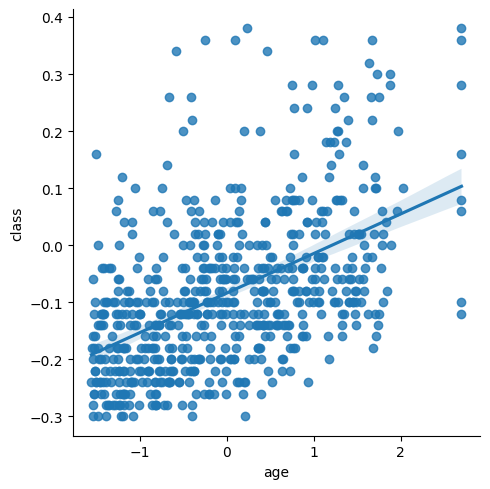

In [102]:
sns.lmplot(structural_visual,x='age',y='class')

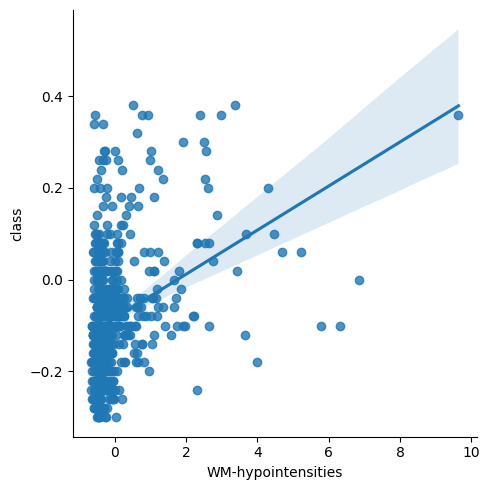

In [103]:
sns.lmplot(structural_visual,x='WM-hypointensities',y='class')

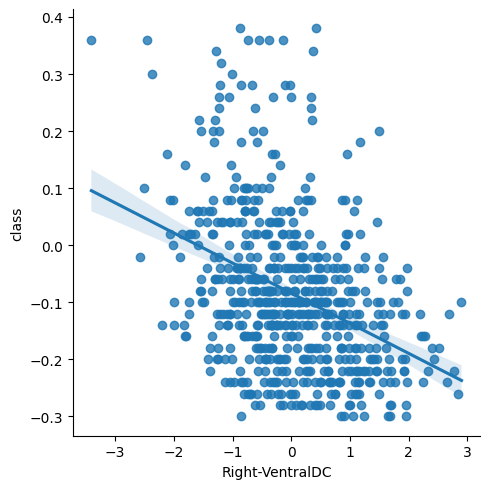

In [104]:
sns.lmplot(structural_visual,x='Right-VentralDC',y='class')